# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import torch
import torch.optim as optim
import torch.nn as nn

2022-06-12 01:19:52.155108: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-12 01:19:52.155138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Generation

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Model Configuration

In [3]:
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

2022-06-12 01:19:57.261287: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-12 01:19:57.261392: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aryaman-Surface-Book-2): /proc/driver/nvidia/version does not exist
2022-06-12 01:19:57.262361: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training

In [22]:
my_callback = [
    keras.callbacks.ModelCheckpoint(
        filepath = "train_data_checkpoint_path.keras",
        monitor = 'val_loss',
        save_best_only = True)
]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, 
          callbacks=my_callback, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 19s 19ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0391 - val_accuracy: 0.9913
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0362 - val_accuracy: 0.9926
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0377 - val_accuracy: 0.9927
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0475 - val_accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0381 - val_accuracy: 0.9923


# Evaluation

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy:\t {test_acc:.3f}")
print(f"Test Loss:\t {test_loss:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0381 - accuracy: 0.9923
Test Accuracy:	 0.992
Test Loss:	 0.038


# Training on the full dataset (`train` + `test`)

In [19]:
total_images = np.concatenate((train_images, test_images))
total_labels = np.concatenate((train_labels, test_labels))
total_images.shape, test_labels.shape

((70000, 28, 28, 1), (10000,))

In [25]:
my_callback2 = [
    keras.callbacks.ModelCheckpoint(
    filepath = "total_data_checkpoint_path.keras",
    monitor = 'loss',
    save_best_only = True)
]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(total_images, total_labels, epochs=10, batch_size=64, 
          callbacks=my_callback2)

Epoch 1/10
1094/1094 [==============================] - 21s 19ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 2/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 3/10
1094/1094 [==============================] - 21s 19ms/step - loss: 0.0028 - accuracy: 0.9992
Epoch 4/10
1094/1094 [==============================] - 21s 19ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 5/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 6/10
1094/1094 [==============================] - 21s 19ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 7/10
1094/1094 [==============================] - 21s 20ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 8/10
1094/1094 [==============================] - 23s 21ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/10
1094/1094 [==============================] - 21s 19ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 10/10
1094/1094 [==============================] - 21s 19m

# Saving the Model

In [26]:
dump(model, "convnet_for_mnist.joblib")

2022-06-11 22:52:20.541022: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://30e52e65-d6c6-420a-81cf-d133ac680dba/assets


['convnet_for_mnist.joblib']

In [27]:
loaded_model = load("convnet_for_mnist.joblib")
lm_test_loss, lm_test_acc = loaded_model.evaluate(test_images, test_labels)
print(f"Test Accuracy:\t {lm_test_acc:.3f}")
print(f"Test Loss:\t {lm_test_loss:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 3.7286e-04 - accuracy: 0.9998
Test Accuracy:	 1.000
Test Loss:	 0.000


# Augmenting Images

In [59]:
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.3)       # 30%
])

**Before data augmentation**

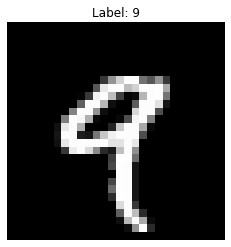

In [44]:
index = 4
digit = train_images[index]
plt.imshow(digit, cmap=plt.get_cmap('gray'))
plt.title(f"Label: {train_labels[index]}")
plt.axis('off');

**After data augmentation**

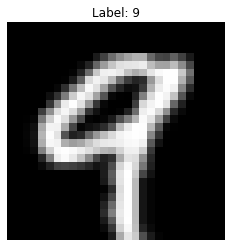

In [58]:
augmented_digit = data_augmentation(digit).numpy()
plt.imshow(augmented_digit, cmap=plt.get_cmap('gray'))
plt.title(f"Label: {train_labels[index]}")
plt.axis('off');